**loan**

# synthentic Dataset for Risk Assessment and loan Approval Modeling

This synthetic dataset comprises 20000 records of personal and financial data,designed to facilitate  the development of predictive models for risk assessment. The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

  It serves two primary purposes:

  * Risk Score Regression: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

  * Binary Classification: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.



https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval

##  Libraries

In [ ]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
#-------------------------------
# Machine Learning Algorithms - Regression
# ------------------------------
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities

## Data

In [ ]:
loan=pd.read_csv("Loan.csv")
loan

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


##  understanding the Data

In [ ]:
#shape of the data
loan.shape

(20000, 36)

In [ ]:
#display first n rows
loan.head(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0
5,2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,...,14859.166670,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1,44.0
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,...,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
7,2018-01-08,49,97345,516,Employed,High School,23,19634,12,Divorced,...,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4
8,2018-01-09,34,116841,603,Employed,Bachelor,12,55353,60,Divorced,...,9736.750000,0.728397,3,7711,0.258853,0.291539,1762.199026,0.246509,0,61.0
9,2018-01-10,46,40615,612,Employed,Associate,19,25443,12,Married,...,3384.583333,0.615323,3,116812,0.184443,0.197271,2353.577424,0.903384,0,53.0


In [ ]:
#display last n rows
loan.tail(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19990,2072-09-24,54,96264,621,Employed,Bachelor,28,38031,48,Single,...,8022.000000,0.512786,5,2604,0.222531,0.196153,1149.516437,0.185804,1,37.6
19991,2072-09-25,34,60433,555,Employed,High School,10,11299,60,Married,...,5036.083333,0.755652,5,82320,0.238799,0.226940,316.540575,0.144466,1,42.4
19992,2072-09-26,50,34282,578,Employed,High School,27,28489,48,Single,...,2856.833333,0.839598,2,10790,0.234489,0.243943,935.014359,0.479557,0,58.0
19993,2072-09-27,50,30578,588,Employed,Bachelor,29,14654,48,Single,...,2548.166667,0.889639,3,3445,0.215654,0.188936,437.333829,0.225391,0,60.0
19994,2072-09-28,51,33354,562,Employed,High School,30,22082,36,Single,...,2779.500000,0.923075,12,228771,0.226082,0.248882,876.671298,0.383764,0,50.0
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [ ]:
# display random dataset samples
loan.sample(5)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
17066,2064-09-22,41,42503,569,Employed,Associate,17,5674,48,Single,...,3541.916667,0.797412,4,9181,0.216174,0.223224,179.759924,0.252338,0,56.0
14645,2058-02-05,62,33242,485,Employed,High School,37,6592,36,Single,...,2770.166667,0.896229,5,4226,0.249092,0.201583,245.514497,0.198730,0,55.0
4772,2031-01-25,47,74803,609,Self-Employed,Doctorate,24,25742,24,Divorced,...,6233.583333,0.853452,0,75451,0.196242,0.210632,1323.568953,0.314196,1,38.4
1449,2021-12-20,40,50823,596,Employed,Associate,18,9717,48,Married,...,4235.250000,0.706556,6,4471,0.206717,0.176045,283.432404,0.266674,0,65.0
9540,2044-02-14,43,38278,565,Employed,Bachelor,19,40249,36,Married,...,3189.833333,0.774619,2,70553,0.242749,0.242818,1585.043607,0.577473,0,61.0


In [ ]:
#display basic information
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
#display summary statistics
loan.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770758,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [ ]:
#display summary statistics
loan.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770758,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [ ]:
loan.describe(include=['O']).T

,count,unique,top,freq
ApplicationDate,20000,20000,2072-09-17,1
EmploymentStatus,20000,3,Employed,17036
EducationLevel,20000,5,Bachelor,6054
MaritalStatus,20000,4,Married,10041
HomeOwnershipStatus,20000,4,Mortgage,7939
LoanPurpose,20000,5,Home,5925


In [ ]:
print("The features of the Dataset are:")
features=len(loan.columns)
features_list=[feature for feature in loan.columns]
for feature in features_list:
  print(feature)

The features of the Dataset are:
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


Explanation of the features in the dataset:

1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **`LoanApproved`**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **`RiskScore`**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

## Data visualization

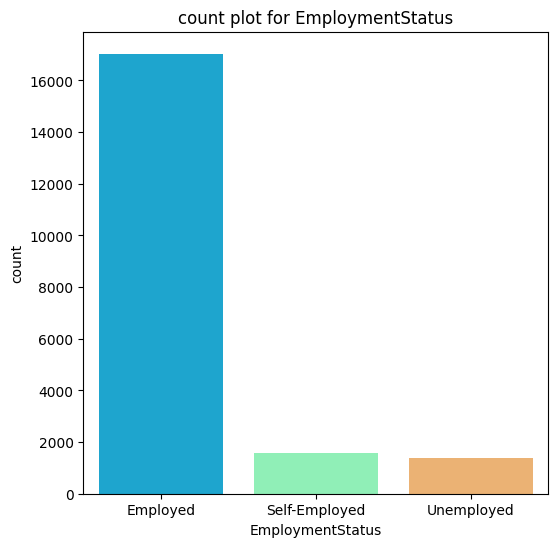

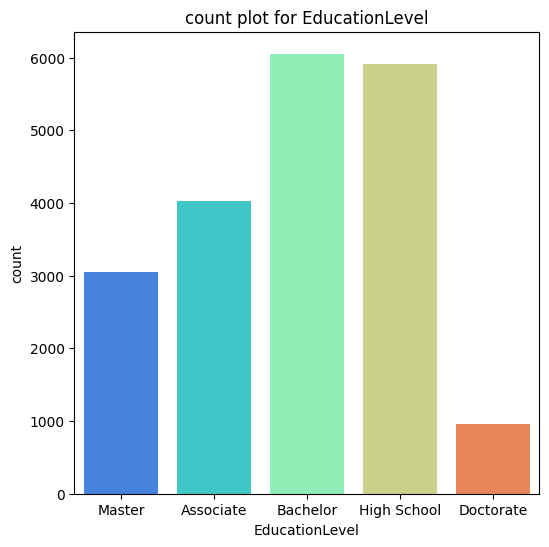

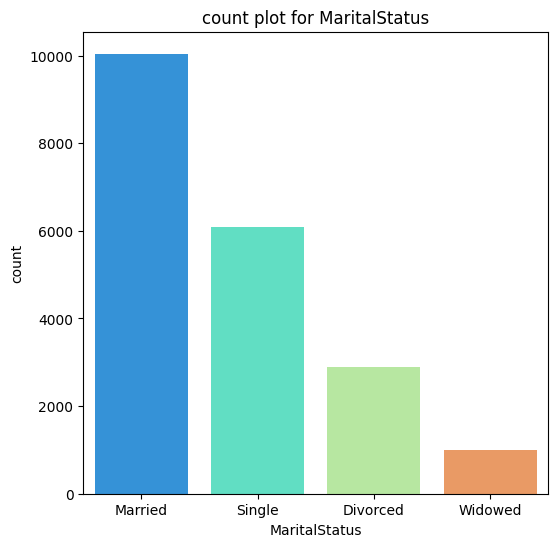

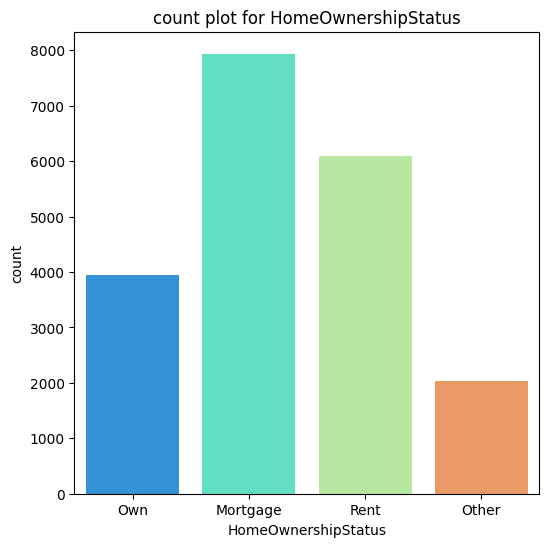

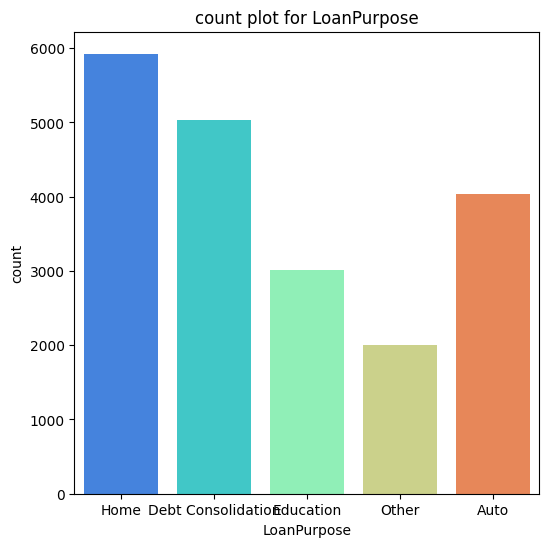

In [ ]:
categorical_columns=loan.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]: #skip the first feature
    plt.figure(figsize=(6,6))
    sns.countplot(data=loan,x=col,hue=col,palette='rainbow')
    plt.title(f"count plot for {col}")
    plt.show()

Most of the needed persons are

*   employed
*   Married
*   comparatively less educated
*   Need loan for building





### categerical columns

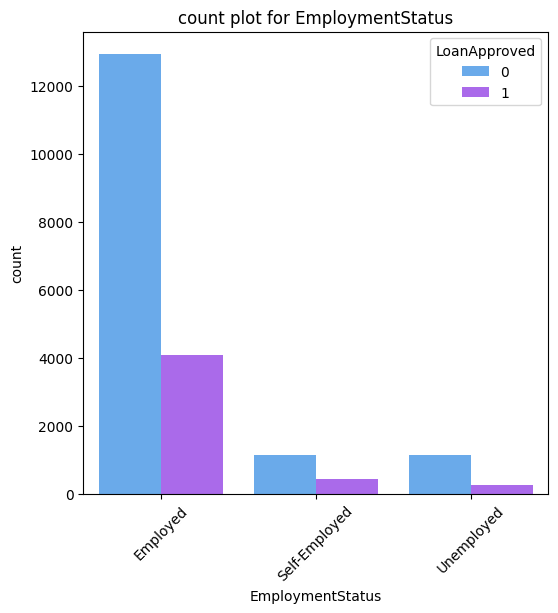

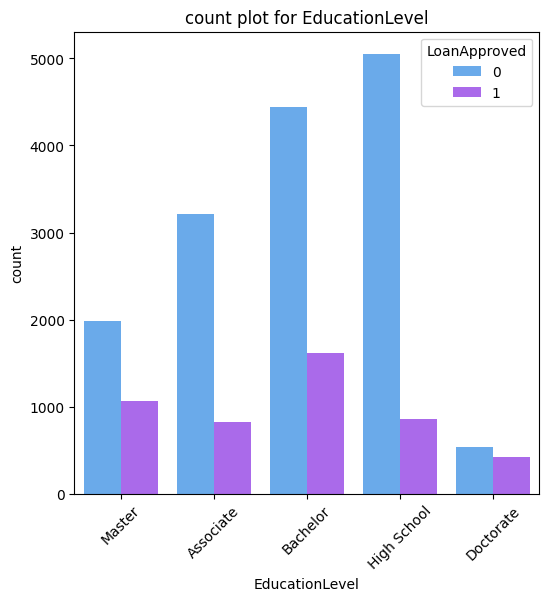

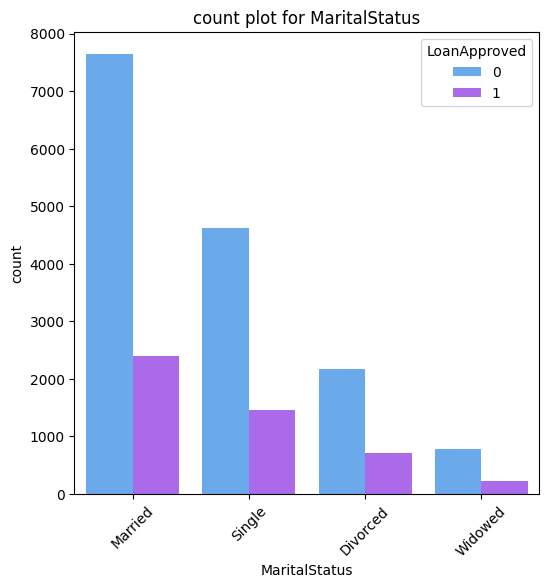

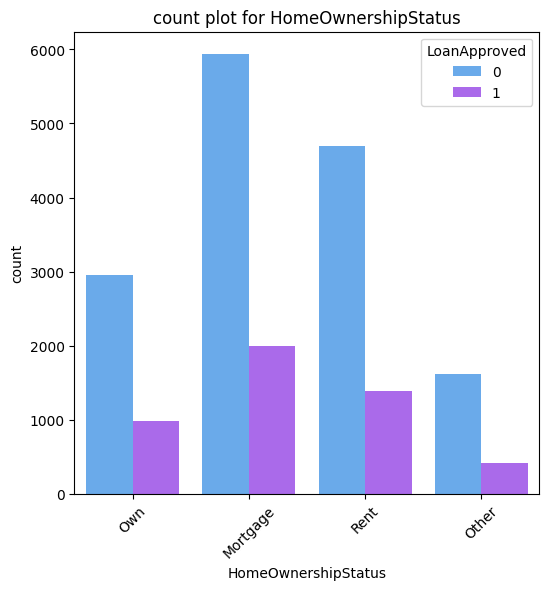

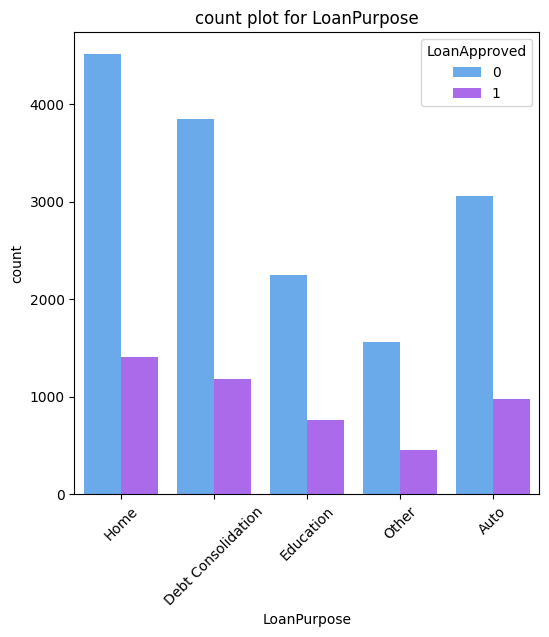

In [ ]:
categorical_columns=loan.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]: #skip the first feature
    plt.figure(figsize=(6,6))
    sns.countplot(data=loan,x=col,hue='LoanApproved',palette='cool')
    plt.title(f"count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.show()

Majority of loan requests are rejected in all categories (the might be some othe reason affecting the rickscore)

###  Numerical columns

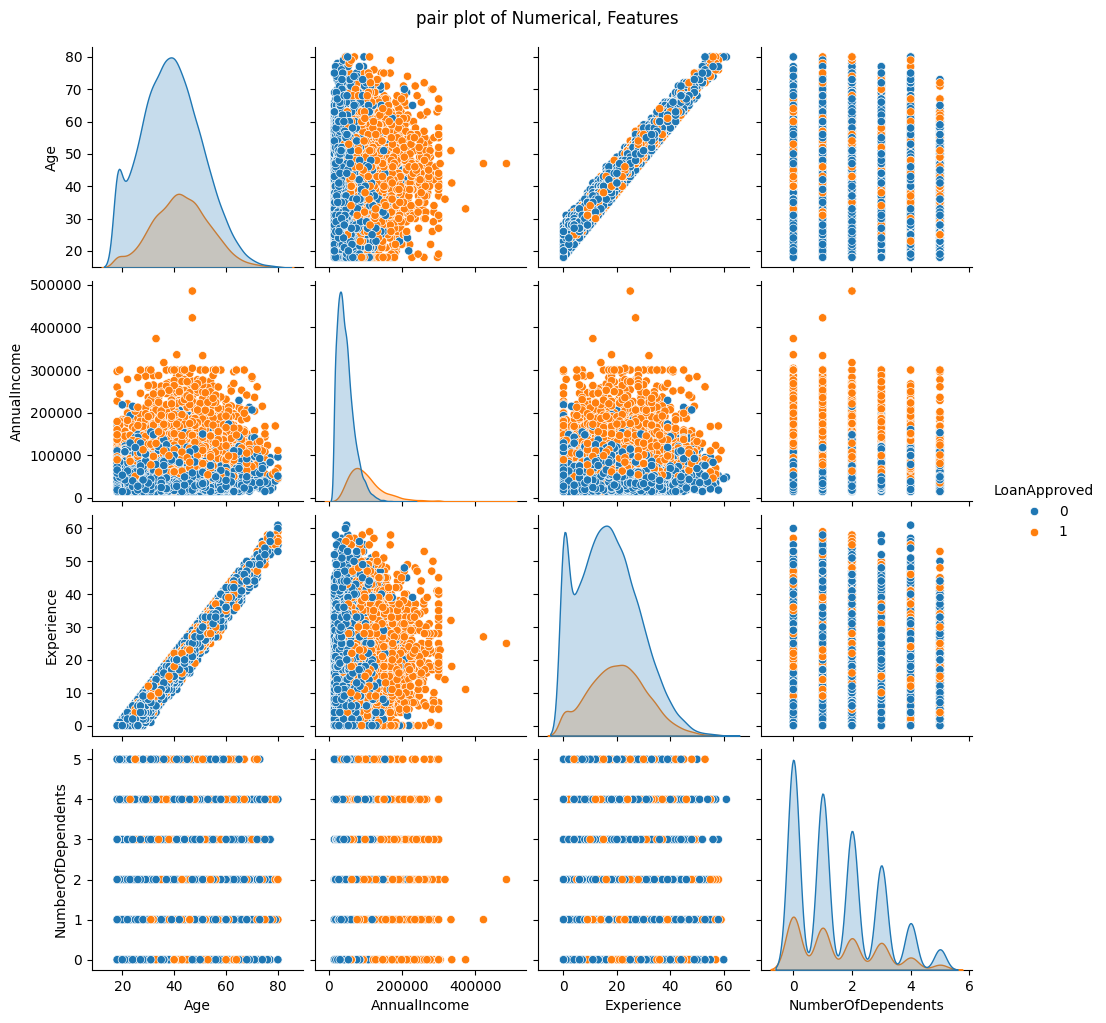

In [ ]:
# Multivariavte analysis : pairplot of features (personal details)
sns.pairplot(loan[['Age','AnnualIncome','Experience','NumberOfDependents',"LoanApproved"]],hue='LoanApproved')
plt.suptitle('pair plot of Numerical, Features',y=1.02)
plt.show()

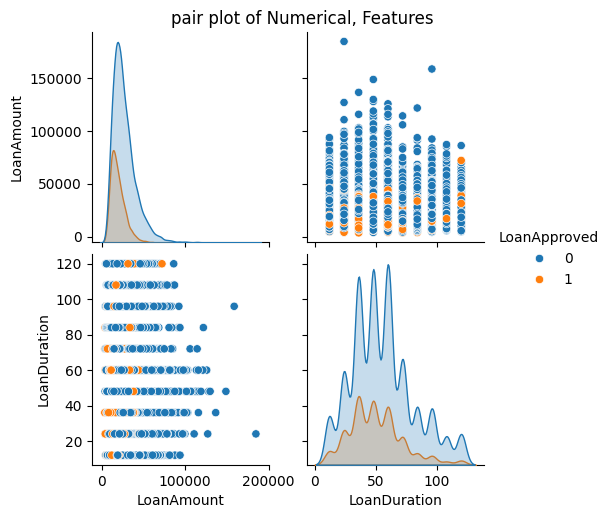

In [ ]:
# Multivariavte analysis : pairplot of features (Loan details)
sns.pairplot(loan[['LoanAmount','LoanDuration',"LoanApproved"]],hue='LoanApproved')
plt.suptitle('pair plot of Numerical, Features',y=1.02)
plt.show()

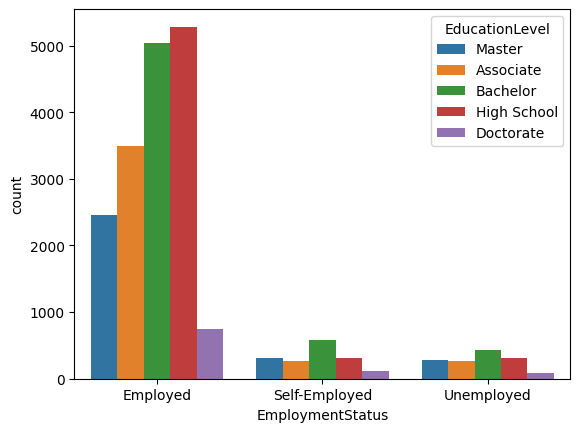

In [ ]:
sns.countplot(x="EmploymentStatus",hue="EducationLevel",data=loan)
plt.show()

### Target Variable-y

*   Riskscore: Tp predict a continuous rishk score associated with each individual's likelihood of loan default or financial instability.
*   loan Approval: To determine the binary outcomes of loan approval,
indicating whether an applicat is likely to be Approved or denied for a loan.



<ipython-input-93-0253505e0ad9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.barplot(x='LoanApproved',y='LoanAmount',data=loan,palette='cool')


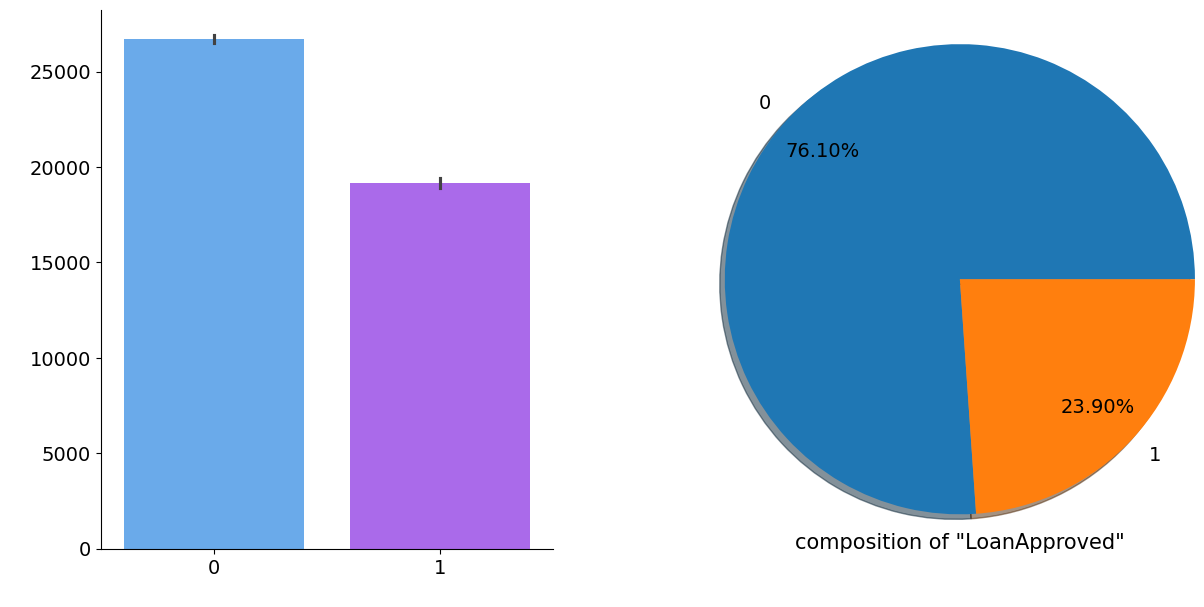

In [ ]:
# checking the target
plt.figure(figsize=(14,7))
#barplot
ax1=plt.subplot(1,2,1)
cp=sns.barplot(x='LoanApproved',y='LoanAmount',data=loan,palette='cool')
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
#pie plot
ax2=plt.subplot(1,2,2)
plt.pie(x=loan["LoanApproved"].value_counts(),labels=list(loan["LoanApproved"].unique()),autopct="%2.2f%%",pctdistance=0.8,shadow=True,
         radius=1.3,textprops={"fontsize":14})
ax2.set_xlabel("")
plt.xlabel('composition of "LoanApproved"',fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

No need of sampling since there are only two categories in the target column and not that much difference in the values.

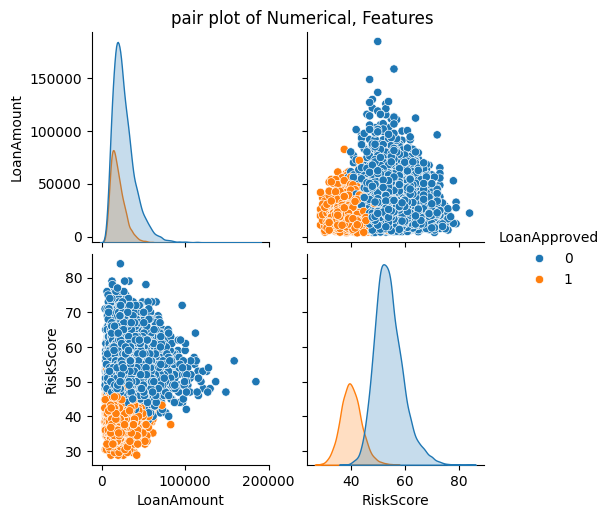

In [ ]:
sns.pairplot(loan[['LoanAmount','RiskScore',"LoanApproved"]],hue='LoanApproved')
plt.suptitle('pair plot of Numerical, Features',y=1.02)
plt.show()

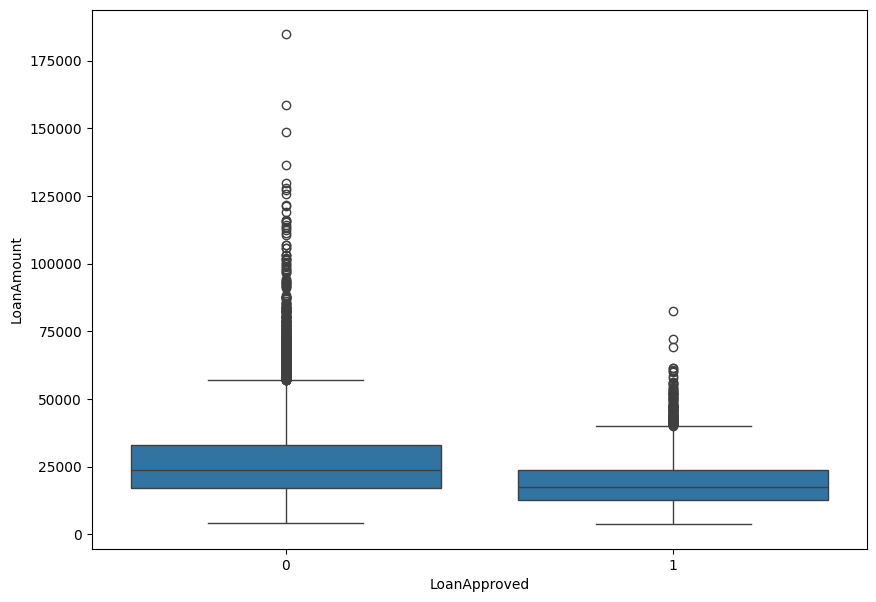

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan,x='LoanApproved',y="LoanAmount")
plt.show()

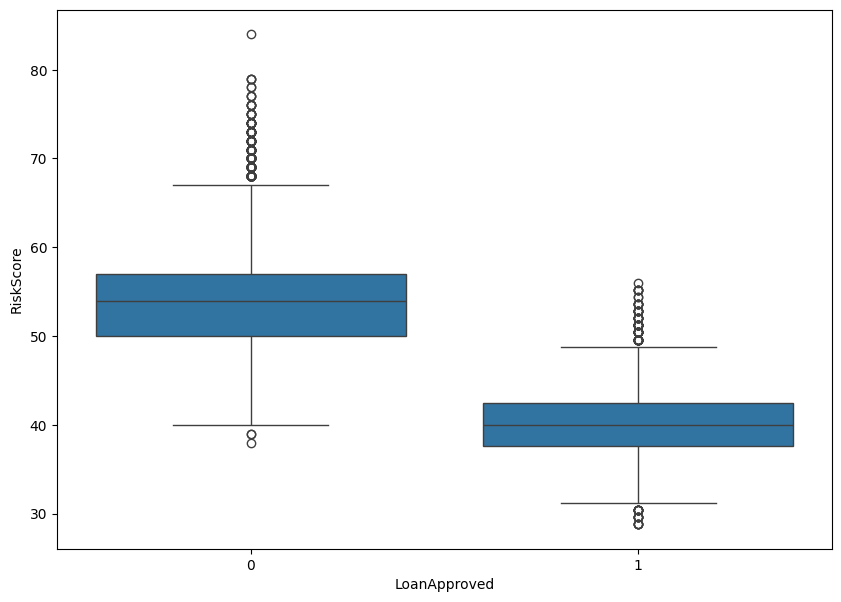

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan,x='LoanApproved',y="RiskScore")
plt.show()

## Data Cleaning

### handling Null/ duplicates values

In [ ]:
# delecting duplicates
loan.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
19995,False
19996,False
19997,False
19998,False


In [ ]:
loan.duplicated().sum()

np.int64(0)

no duplicates in  this dataset

In [ ]:
loan.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


no null values in this  dataset

### Feature Engineering

In [ ]:
loan['BankBalance']=loan['SavingsAccountBalance']+loan['CheckingAccountBalance']
loan.drop('SavingsAccountBalance',axis=1,inplace=True)
loan.drop('CheckingAccountBalance',axis=1,inplace=True)

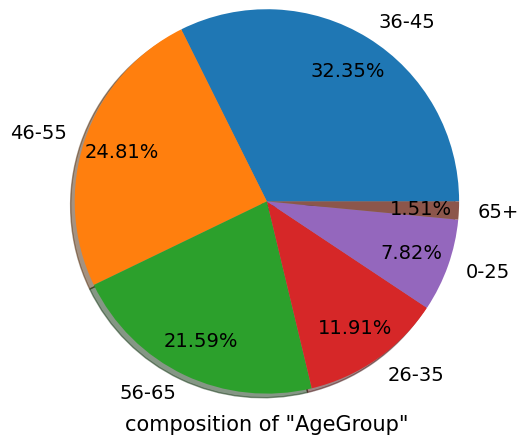

In [ ]:
loan['AgeGroup']=pd.cut(loan['Age'],bins=[0,25,35,45,55,65,100],labels=['0-25','26-35','36-45','46-55','56-65','65+'])
plt.pie(x=loan['AgeGroup'].value_counts(),
labels=list(loan['AgeGroup'].unique()),
autopct='%2.2f%%',
pctdistance=0.8,
shadow=True,
radius=1.3,textprops={"fontsize":14})
plt.xlabel('composition of "AgeGroup"',fontsize=15,labelpad=20)
plt.show()


In [ ]:
loan.drop('AgeGroup',axis=1,inplace=True)

In [ ]:
loan[["year","month","day"]]=loan["ApplicationDate"].str.split("-",expand=True)
loan["year"]=loan["year"].astype(int)
loan["month"]=loan["year"].astype(int)
loan["day"]=loan["day"].astype(int)
loan[["ApplicationDate","year","month","day"]]

,ApplicationDate,year,month,day
0,2018-01-01,2018,2018,1
1,2018-01-02,2018,2018,2
2,2018-01-03,2018,2018,3
3,2018-01-04,2018,2018,4
4,2018-01-05,2018,2018,5
...,...,...,...,...
19995,2072-09-29,2072,2072,29
19996,2072-09-30,2072,2072,30
19997,2072-10-01,2072,2072,1
19998,2072-10-02,2072,2072,2


In [ ]:
loan['year'].max()

2072

so this column contains wrong information

In [ ]:
# the applications features have errors .so drop it
loan.drop(["ApplicationDate","year","month","day"],axis=1,inplace=True)

### Encoding

In [ ]:
categorical_columns=loan.select_dtypes(include=['object','category']).columns.tolist()
print("categorical columns:",categorical_columns)

categorical columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


#### Ordinal Data

many machine learning models ,like decision trees and regression models,relay on the relative order of numeric values. by manually meaningful numbers,the model can better capture the realtionship between the ordinal categories

In [ ]:
loan["EmploymentStatus"].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [ ]:
loan['EmploymentStatus']=loan['EmploymentStatus'].replace({'Unemployed':0,"Self-Employed":1,"Employed":2})



<ipython-input-108-8ed769a7b977>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan['EmploymentStatus']=loan['EmploymentStatus'].replace({'Unemployed':0,"Self-Employed":1,"Employed":2})


In [ ]:
loan["EmploymentStatus"].unique()

array([2, 1, 0])

In [ ]:
loan['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [ ]:
loan['EducationLevel']=loan['EducationLevel'].map({ 'High School':0,'Associate':1,'Bachelor':2,'Master':3,'Doctorate':4})

In [ ]:
loan['EducationLevel'].unique()

array([3, 1, 2, 0, 4])

#### Nominal Data

In [ ]:
le=LabelEncoder()
# exclude the "ApplicationDate" column
for cols in loan.select_dtypes("object").columns:
  if col!="ApplicationDate":
    loan[cols]=le.fit_transform(loan[cols])

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int64  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

## Data Tranformation

### skewed Data

#### histogram

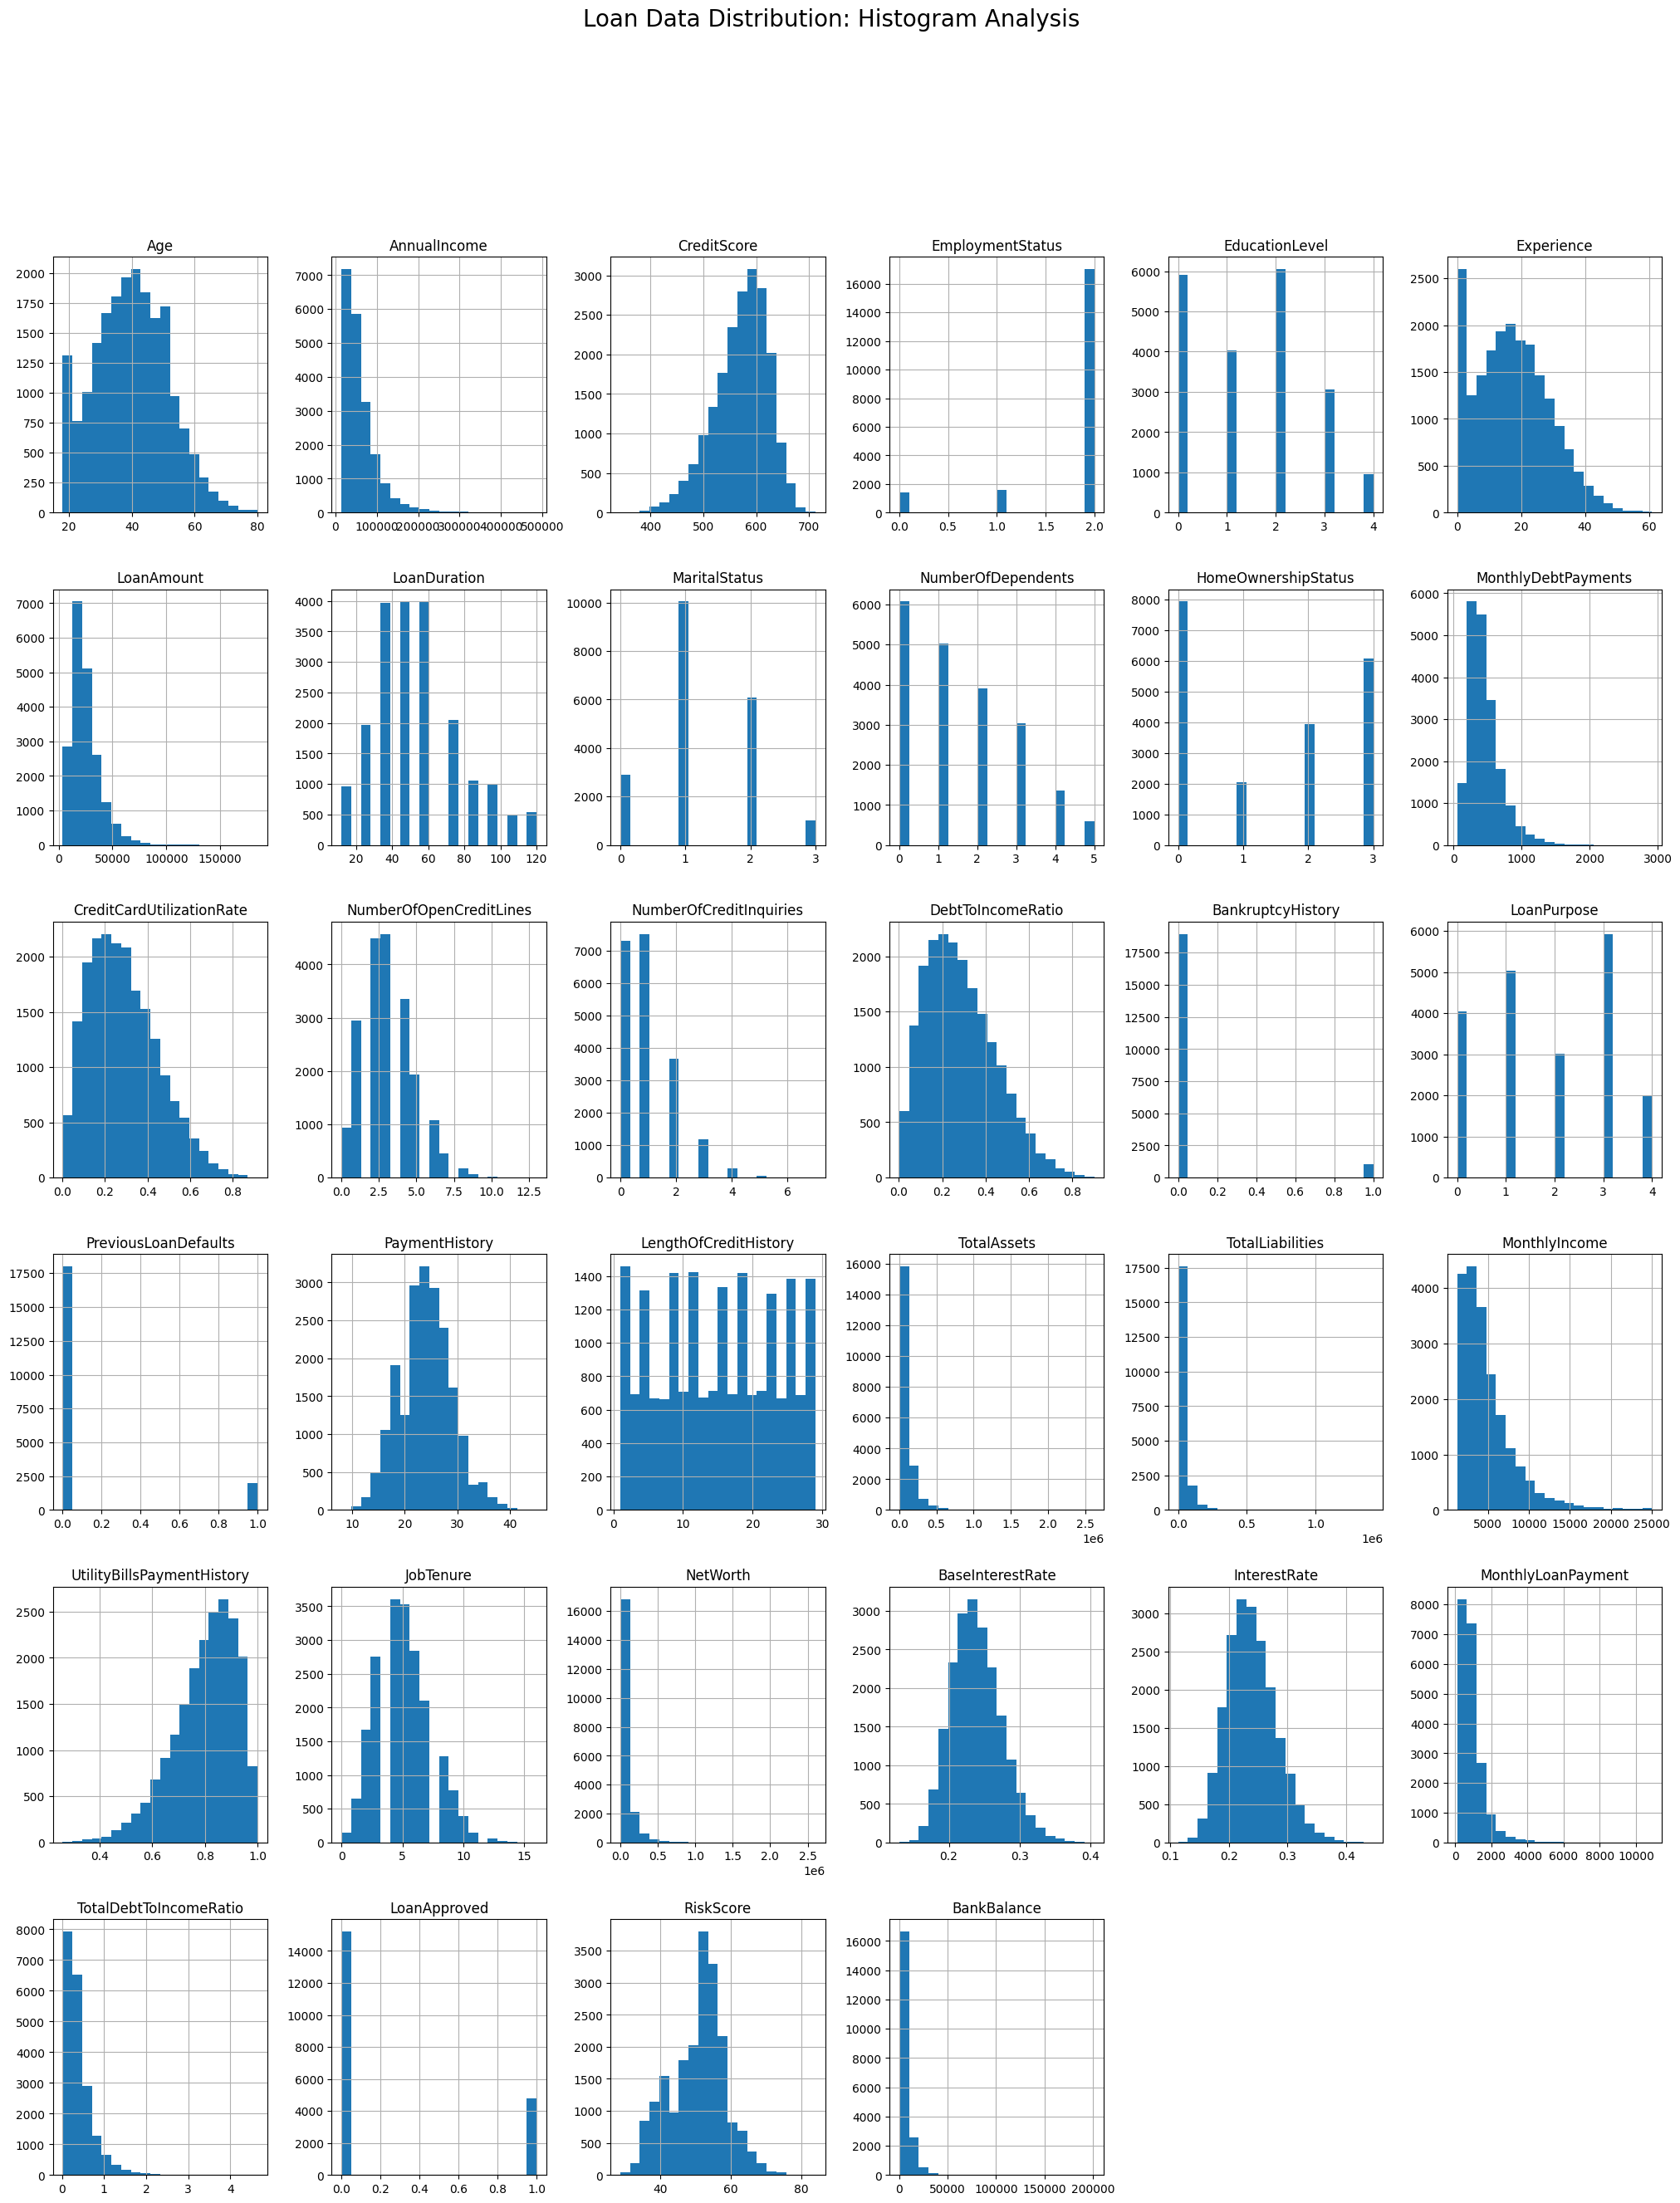

In [ ]:
loan.hist(bins=20,figsize=(25,30))
plt.suptitle('Loan Data Distribution: Histogram Analysis',fontsize=20)
plt.show()

In [ ]:
# calculate skewness for each column
skewness=loan.skew()
# sort the skewness values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)
# display the sorted skewness values
print(sorted_skewness)

EmploymentStatus             -2.455244
UtilityBillsPaymentHistory   -0.846234
CreditScore                  -0.596727
RiskScore                    -0.162062
LengthOfCreditHistory         0.002989
LoanPurpose                   0.025237
HomeOwnershipStatus           0.071497
Age                           0.185964
MaritalStatus                 0.202967
PaymentHistory                0.213465
EducationLevel                0.273155
Experience                    0.339981
JobTenure                     0.436452
BaseInterestRate              0.461850
InterestRate                  0.485491
DebtToIncomeRatio             0.593858
NumberOfOpenCreditLines       0.599662
CreditCardUtilizationRate     0.601131
NumberOfDependents            0.639919
LoanDuration                  0.651330
NumberOfCreditInquiries       1.012065
LoanApproved                  1.224086
MonthlyDebtPayments           1.653435
LoanAmount                    1.833688
MonthlyIncome                 1.992929
AnnualIncome             

In [ ]:
# create a copy of the original data for comparison
loan_copy=loan.copy()
# log Transformation of skewed columns (eg.AnnualIncome,LoanAmount)
loan['AnnualIncome']=np.log1p(loan['AnnualIncome']) # log(1+x) to handle 0 Values
loan['LoanAmount']=np.log1p(loan['LoanAmount'])

The log1p function in numpy stands for log(1+x),where "1p" refers to adding 1 to the input value before taking the logarthm

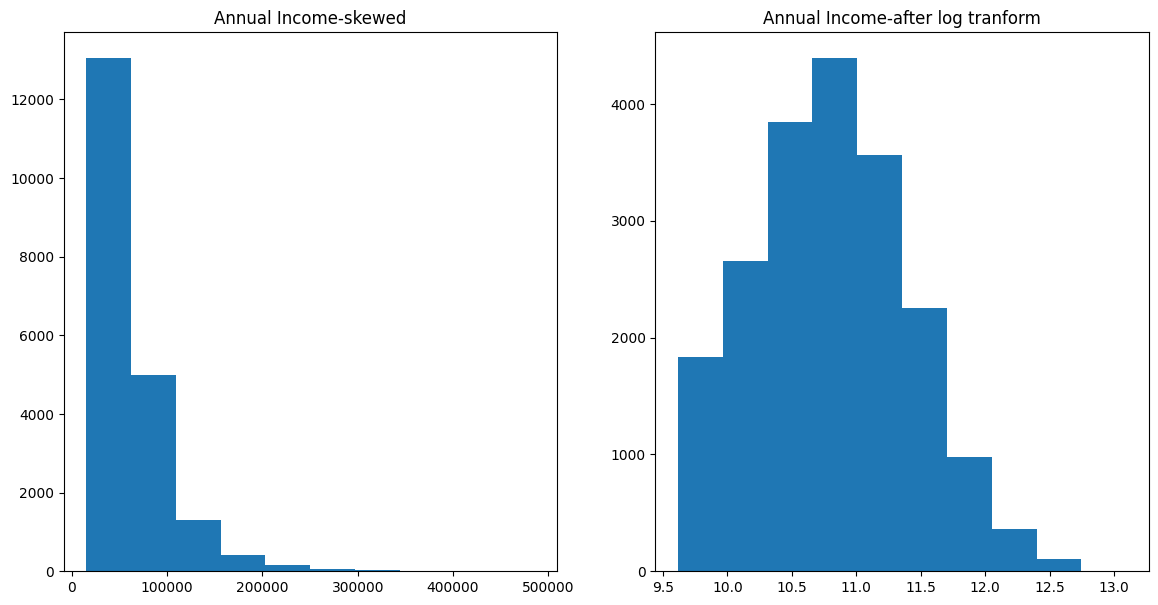

In [ ]:
plt.figure(figsize=(14,7))
#
ax1=plt.subplot(1,2,1)
cp=plt.hist(loan_copy["AnnualIncome"])
plt.title("Annual Income-skewed")
#
ax2=plt.subplot(1,2,2)
cp=plt.hist(loan["AnnualIncome"])
plt.title("Annual Income-after log tranform")
plt.show()

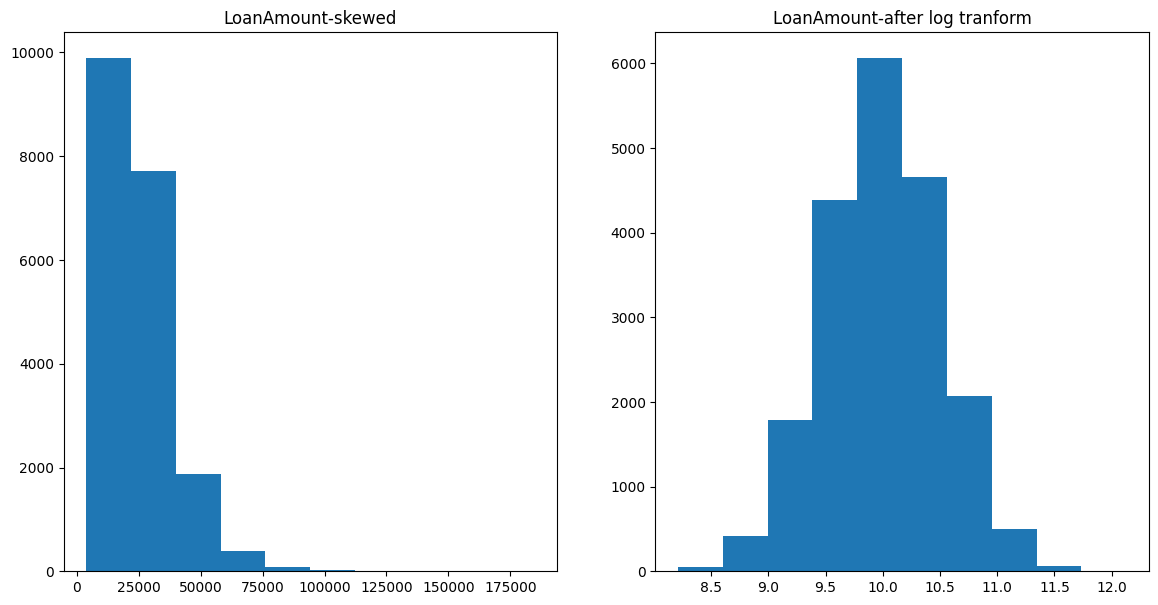

In [ ]:
plt.figure(figsize=(14,7))
#
ax1=plt.subplot(1,2,1)
cp=plt.hist(loan_copy['LoanAmount'])
plt.title("LoanAmount-skewed")
#
ax2=plt.subplot(1,2,2)
cp=plt.hist(loan['LoanAmount'])
plt.title("LoanAmount-after log tranform")
plt.show()

In [ ]:
# step 1: select numeric columns ,excluding "loanApproved"
numeric_columns=loan.drop(columns=['LoanApproved']).select_dtypes(include=['number'])

#step 2: calculate skewness for numeric columns
skewness=numeric_columns.skew()

#step3: identify columns with high skewness (threshold > 1 or < -1)
highly_skewned_columns=skewness[abs(skewness)>1].index

#step 4 : Apply log transformation using np.1p() for columns with high skewness
for col in highly_skewned_columns:
  #create a new columns with log-transformed values
  loan[col]=np.log1p(loan[col])
# check transformed columns
loan.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
0,45,10.595359,617,1.098612,3,22,9.484405,48,1,2,...,0.724972,11,11.751383,0.199652,0.227590,6.042172,0.166427,0,49.0,9.086476
1,38,10.589358,628,1.098612,1,15,10.167619,48,2,1,...,0.935132,3,10.683042,0.207045,0.201077,6.678410,0.329198,0,52.0,8.998137
2,47,10.614597,570,1.098612,2,26,9.777244,36,1,2,...,0.872241,6,8.557567,0.217627,0.212548,6.503400,0.379913,0,52.0,7.485492
3,58,11.143093,545,1.098612,0,34,10.542680,96,2,1,...,0.896155,5,11.507440,0.300398,0.300911,6.955123,0.272389,0,54.0,7.970049
4,37,11.545054,594,1.098612,1,17,9.125327,36,1,1,...,0.941369,5,12.332793,0.197184,0.175990,5.802659,0.067855,1,36.0,8.785234


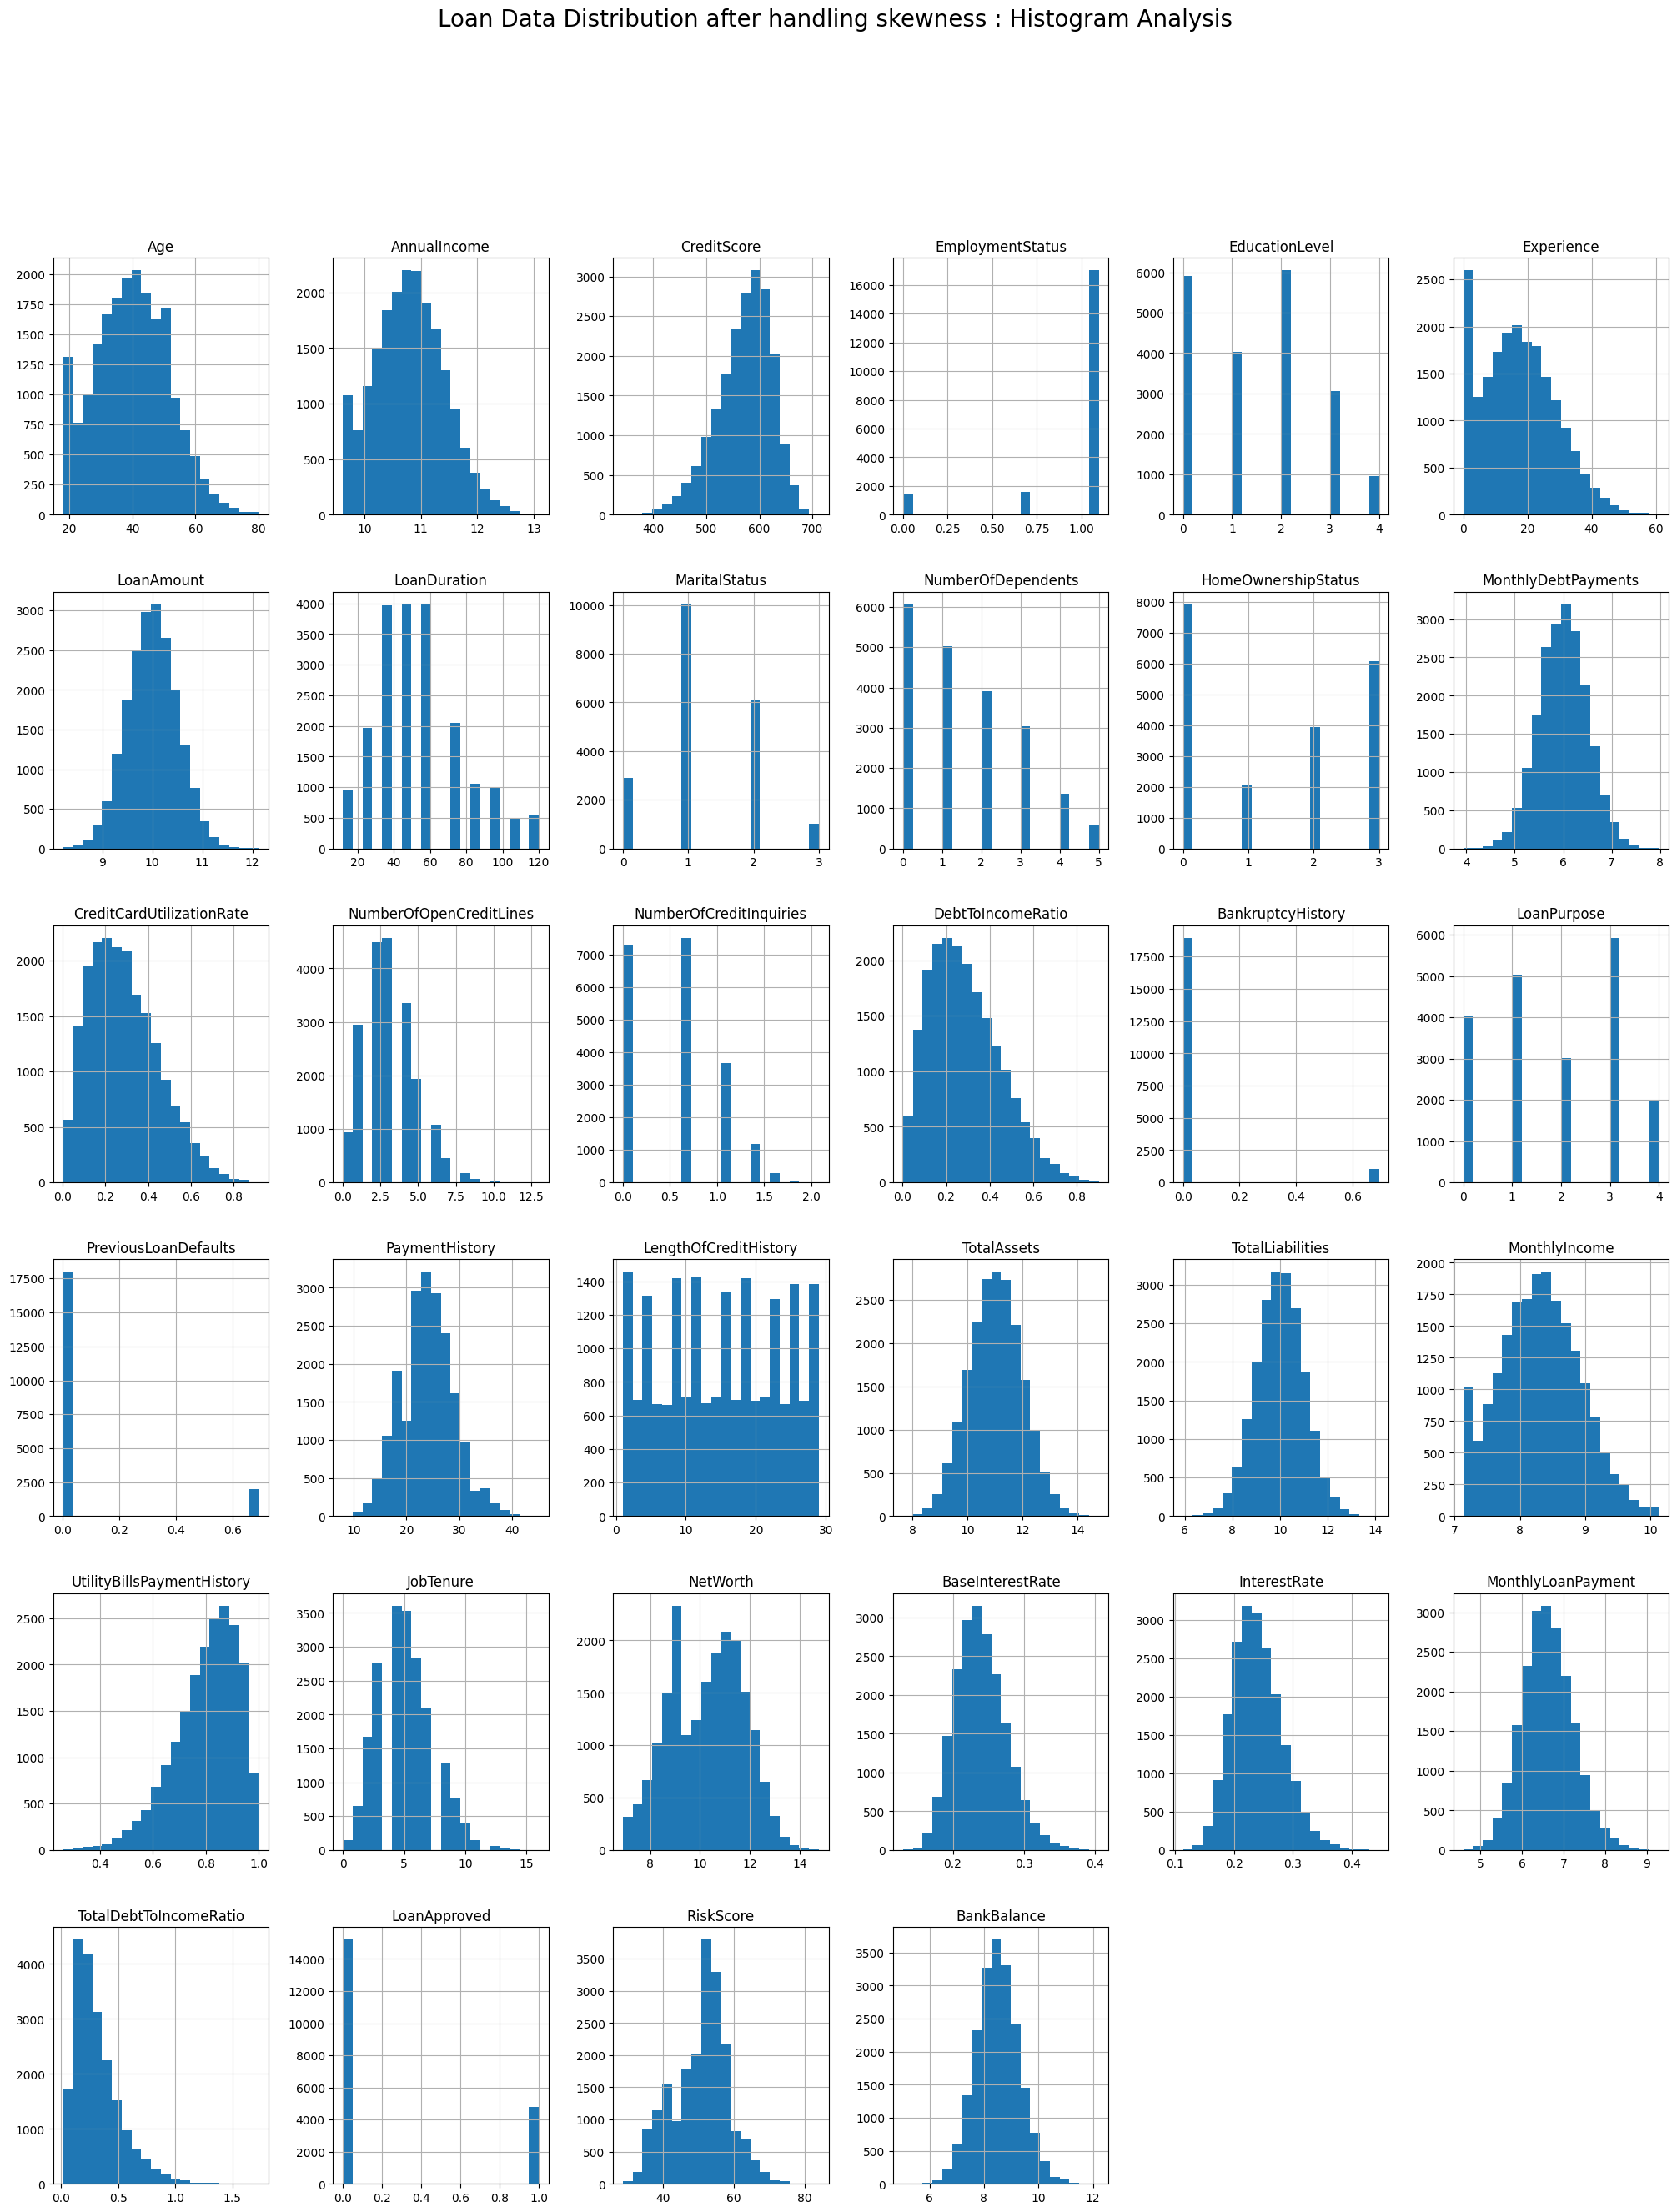

In [ ]:
loan.hist(bins=20,figsize=(25,30))
plt.suptitle('Loan Data Distribution after handling skewness : Histogram Analysis',fontsize=20)
plt.show()

### Removing unwanted features

#### Based on correlation

After analyzing the correlations,you can removes

*   One among two Highly correlated features (between features
themselves).

*  Features with low correlation with the target variable







<Axes: >

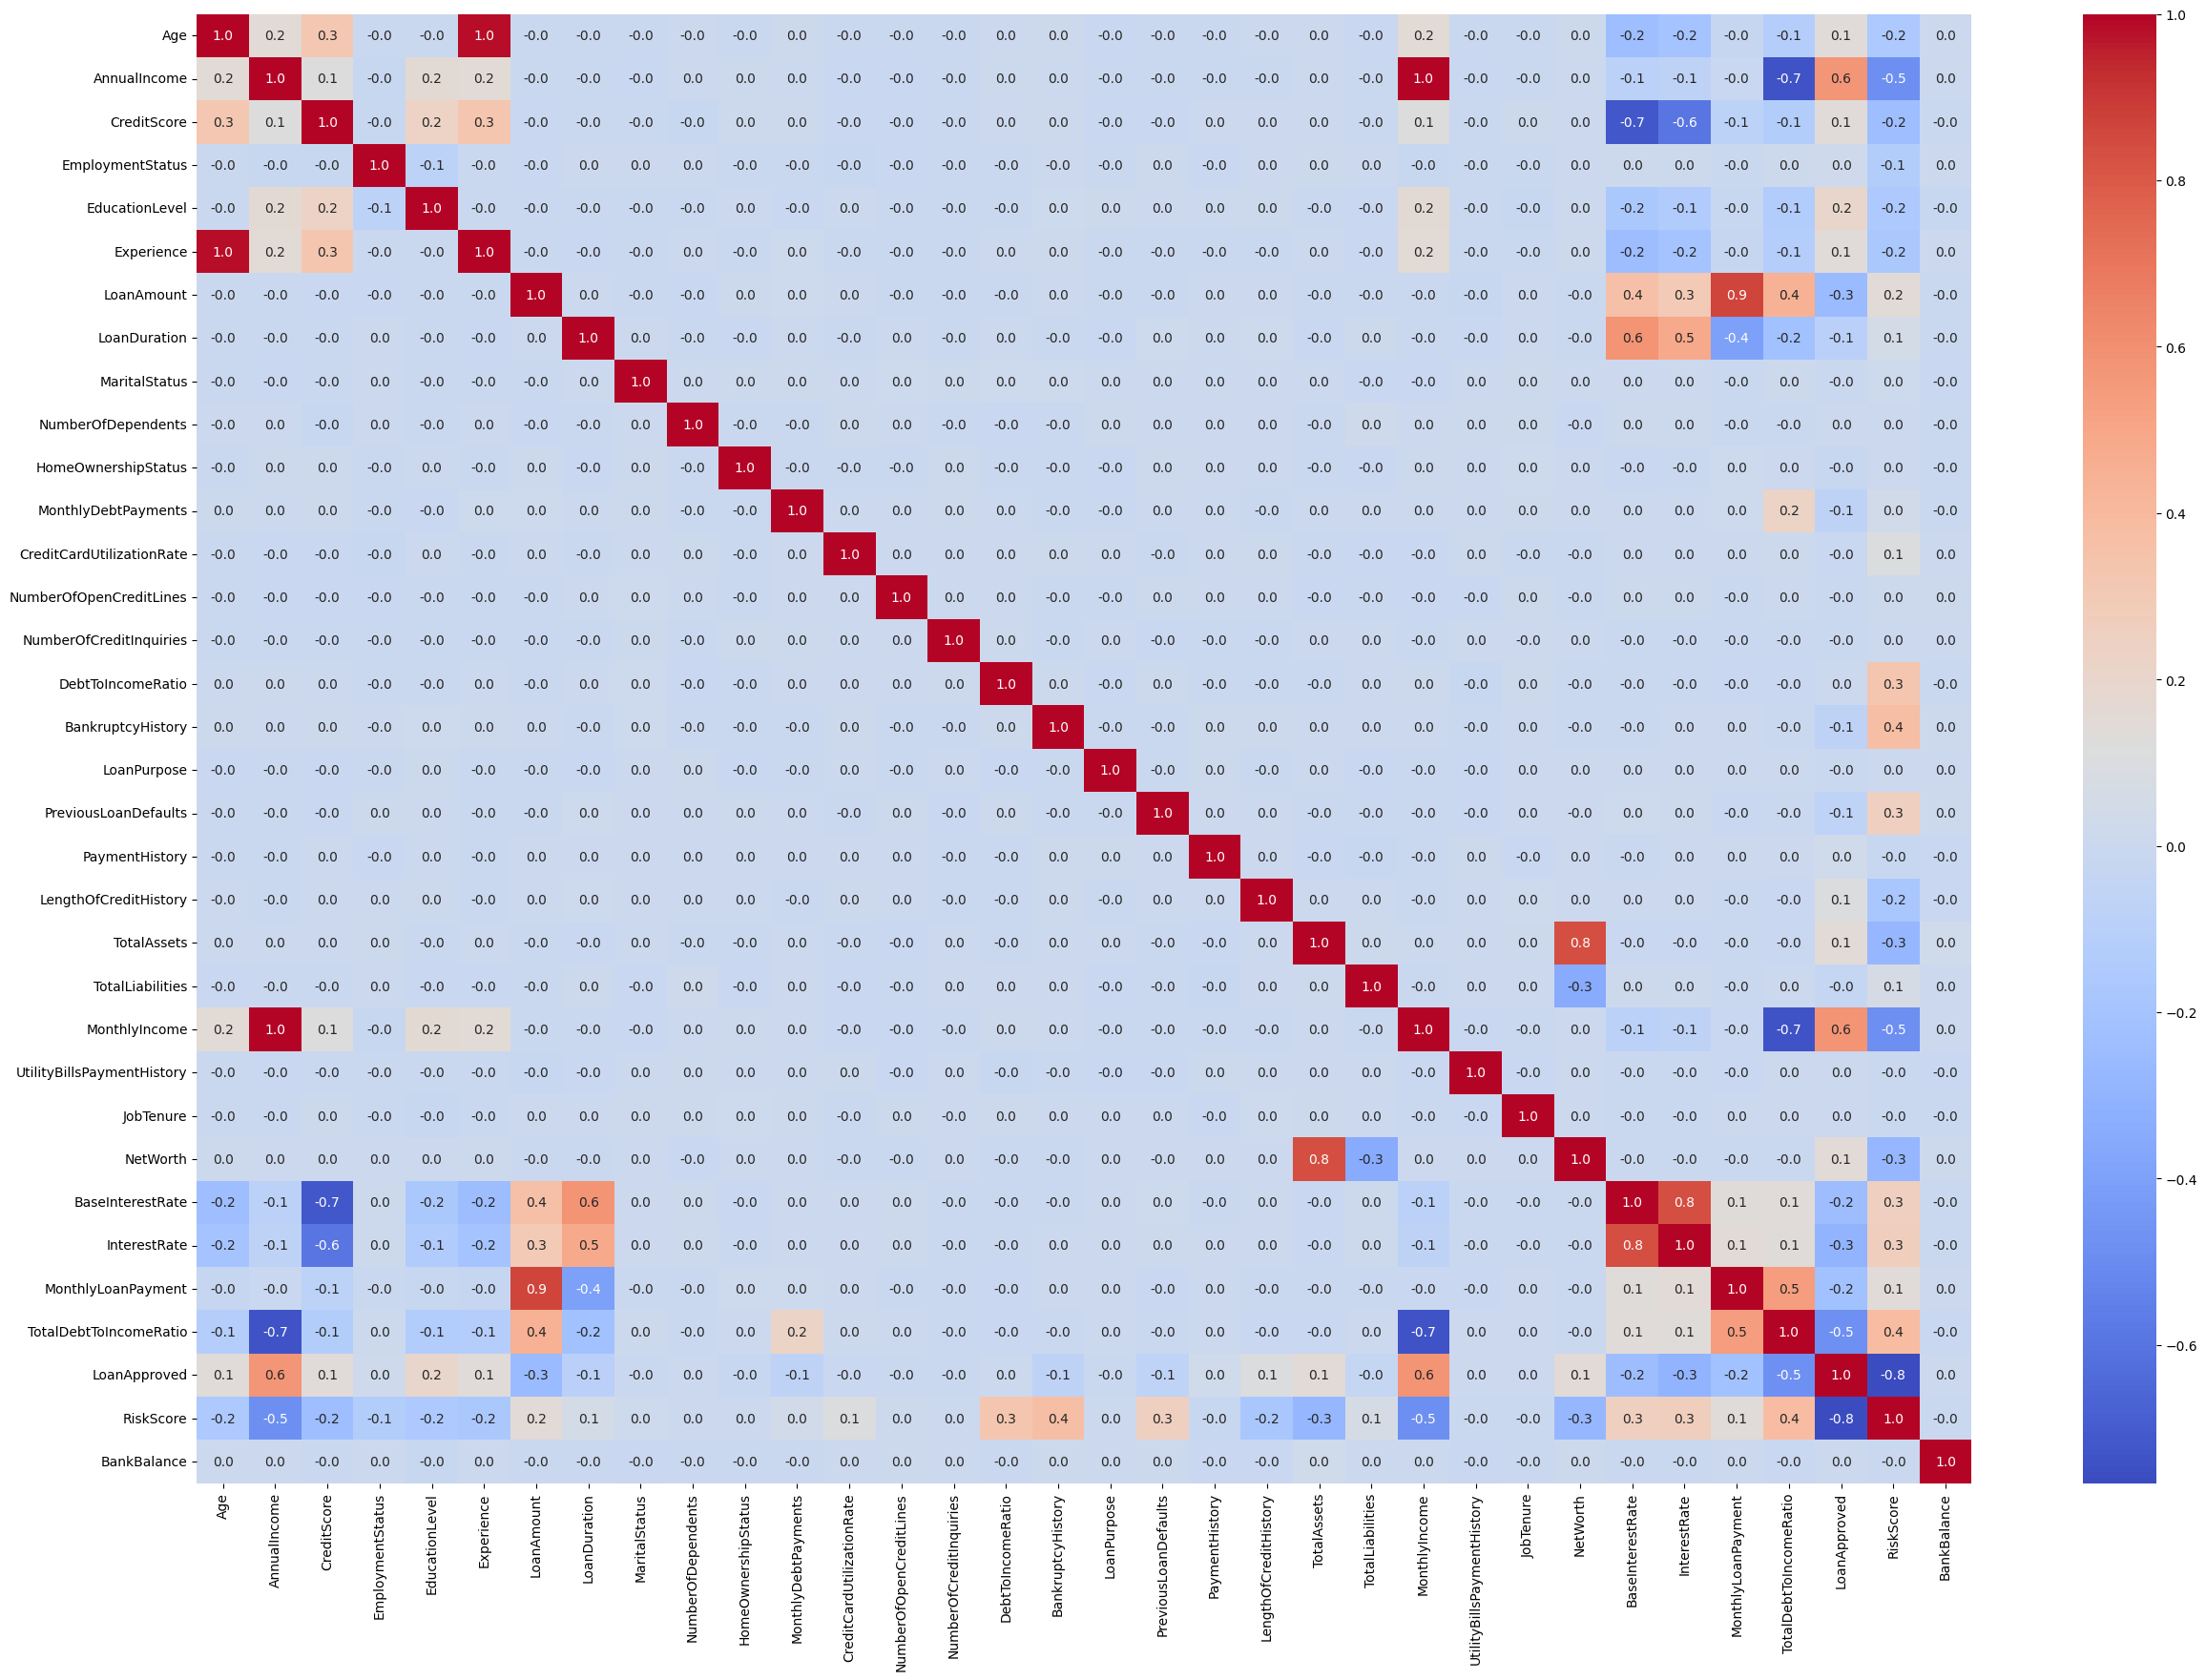

In [ ]:
plt.figure(figsize=(30,20))
loan.corr(numeric_only=True)
sns.heatmap(loan.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='0.01f',annot_kws=None)

In [ ]:
correlation_matrix=loan.corr()
#set the correlation threhold
threshold=0.5
# Find pairs of features with high correlation
highly_correlation_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    # check if the absolute correlation exceeds the thrshold
    if abs(correlation_matrix.iloc[i,j]) > threshold :
      highly_correlation_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
# print all pairs of highly correlated features
print(highly_correlation_pairs)


[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets'), ('BaseInterestRate', 'CreditScore'), ('BaseInterestRate', 'LoanDuration'), ('InterestRate', 'CreditScore'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount'), ('TotalDebtToIncomeRatio', 'AnnualIncome'), ('TotalDebtToIncomeRatio', 'MonthlyIncome'), ('TotalDebtToIncomeRatio', 'MonthlyLoanPayment'), ('LoanApproved', 'AnnualIncome'), ('LoanApproved', 'MonthlyIncome'), ('RiskScore', 'LoanApproved')]


In [ ]:
loan.drop(['Experience', 'AnnualIncome','TotalAssets','BaseInterestRate','MonthlyLoanPayment'],axis=1,inplace=True)

In [ ]:
loan[["TotalDebtToIncomeRatio","MonthlyIncome"]].corr()
 # highly correlated

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.736617
MonthlyIncome,-0.736617,1.000000


In [ ]:
loan.drop("TotalDebtToIncomeRatio",axis=1,inplace=True)

In [ ]:
# step1 : calculate the correlation of each feature with the target
corr_with_target=loan.corr()["LoanApproved"].sort_values(ascending=False)

# step2: set the threshold for low correlation (-0.1 to 0.1)
low_corr_features= corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

# step 3: print the list of features with low correlation
print("Features with correlation batween -0.05 and 0.05:")
low_corr_features

Features with correlation batween -0.05 and 0.05:


,LoanApproved
PaymentHistory,0.030804
EmploymentStatus,0.024961
JobTenure,0.004997
BankBalance,0.004973
UtilityBillsPaymentHistory,0.003303
NumberOfDependents,0.001717
DebtToIncomeRatio,0.000034
NumberOfOpenCreditLines,-0.004769
MaritalStatus,-0.006828
NumberOfCreditInquiries,-0.006837


In [ ]:
# below features are very less correlated with the large the target  variable
loan.drop(['JobTenure','UtilityBillsPaymentHistory',
           'NumberOfDependents','DebtToIncomeRatio',
           'NumberOfOpenCreditLines',
           'NumberOfCreditInquiries',
           'MaritalStatus','LoanPurpose'],axis=1,inplace=True)


the goal is the retain features that are strongly correlated with the target variable (either positively or negatively) and remove those that have little or no relationship

In [ ]:
# step1 : calculate the correlation of each feature with the target
corr_with_target=loan.corr()["RiskScore"].sort_values(ascending=False)

# step2: set the threshold for low correlation (-0.1 to 0.1)
low_corr_features= corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

# step 3: print the list of features with low correlation
print("Features with correlation batween -0.05 and 0.05:")
low_corr_features

Features with correlation batween -0.05 and 0.05:


,RiskScore
MonthlyDebtPayments,0.037533
HomeOwnershipStatus,0.004454
BankBalance,-0.001408
PaymentHistory,-0.016992


In [ ]:
loan.drop(["MonthlyDebtPayments","HomeOwnershipStatus","BankBalance",'PaymentHistory'],axis=1,inplace=True)

In [ ]:
loan.columns

Index(['Age', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
       'LoanAmount', 'LoanDuration', 'CreditCardUtilizationRate',
       'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'InterestRate',
       'LoanApproved', 'RiskScore'],
      dtype='object')

In [ ]:
loan.drop(['Age'],axis=1,inplace=True)

In [ ]:
loan.drop(['LoanDuration'],axis=1,inplace=True)

In [ ]:
loan.drop(['EducationLevel'],axis=1,inplace=True)

In [ ]:
loan.columns

Index(['CreditScore', 'EmploymentStatus', 'LoanAmount',
       'CreditCardUtilizationRate', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalLiabilities',
       'MonthlyIncome', 'NetWorth', 'InterestRate', 'LoanApproved',
       'RiskScore'],
      dtype='object')

#### PCA

PCA reduces the number of features (dimensions) in a dataset.


*  pricncipal compenonts: These are the new features created by PCA.
   each principal component is a linear combination of the original features, and they are ranked based on the amount varince they explain in the data




In [ ]:
from sklearn. decomposition import PCA
# Apply PCA
pca=PCA(n_components=5) # you can change the number of components to retain
loan_pca=pca.fit_transform(loan)
# Create a Dataframe with PCA results
loan_pca_df=pd.DataFrame(loan_pca,columns=[f'pc{i+1}'for i in range(loan_pca.shape[1])])
# step5 : combine the PCA components with original dataframe if needed
loan_pca_final=pd.concat([loan.reset_index(drop=True),loan_pca_df],axis=1)
# now loan_pca_final_df conatainsthe original data along with pca compenonts
loan_pca_df.head()

,pc1,pc2,pc3,pc4,pc5
0,45.415168,-5.118133,-3.169741,1.365916,0.452133
1,56.295083,-6.876061,-0.186502,0.848532,-0.549209
2,-1.650936,5.432465,4.699554,-2.103498,1.017684
3,-26.719513,-5.348505,-0.664767,1.748307,-0.831976
4,22.939609,17.472947,-6.044662,1.258010,0.367145


### scaling

standardization and normalization are two common techiques used in preprocessing scale

#### standardization:
* standardization transforms data to have a means of 0 and a standard deviation of 1. this is done by subtracting the mean of the data and dividing by the standard deviation
* standardization is useful when your data allow a normal distribution or if using machine learning algorithms that normally distributed (linear regression ,logostic regression,svm,etc.) it works well with algorithms that rely on the distance between data points (e.g., k-NN,PCA).

In [ ]:
# create a copy of the original data for  comparison
loan_scaled_df=loan.copy()

# select numeric columns, excluding "LoanApproved"
numeric_columns=loan.drop(columns=['LoanApproved']).select_dtypes(include=["number"]).columns

# initialize the standardscaler
scaler=StandardScaler()

# Apply the scaler only to the numeric columns
loan_scaled_df[numeric_columns]=scaler.fit_transform(loan[numeric_columns])
loan_scaled_df.head()

,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore
0,0.890021,0.371144,-1.014008,0.425792,-0.235154,-0.333426,-0.711630,-0.136881,-0.324366,1.020941,-0.272968,0,-0.227149
1,1.105724,0.371144,0.343015,-1.242602,-0.235154,-0.333426,-0.711630,-0.828648,-0.334247,0.287206,-0.901165,0,0.158551
2,-0.031618,0.371144,-0.432362,-0.932273,-0.235154,-0.333426,0.841287,1.765237,-0.292687,-1.172566,-0.629370,0,0.158551
3,-0.521852,0.371144,1.087972,-0.117617,-0.235154,-0.333426,-0.592175,-1.408173,0.577602,0.853401,1.464331,0,0.415684
4,0.439006,0.371144,-1.727221,0.213746,-0.235154,-0.333426,1.438563,-0.240858,1.239575,1.420252,-1.495584,1,-1.898515


#### Normalization
* normalization transforms data to a specfic range, usually [0,1] or [-1,1].the idea is to rescale the data without distorting the differences in the ranges of values.
* normalization is preferred when you know that the does not follow a normal distribution and when you need to constrain the data within a fixed range .it is commonly used in algorithms such as  nerual network and k-means clustering , where the magnitude of the data matters.


### handling outlier

#### boxplots






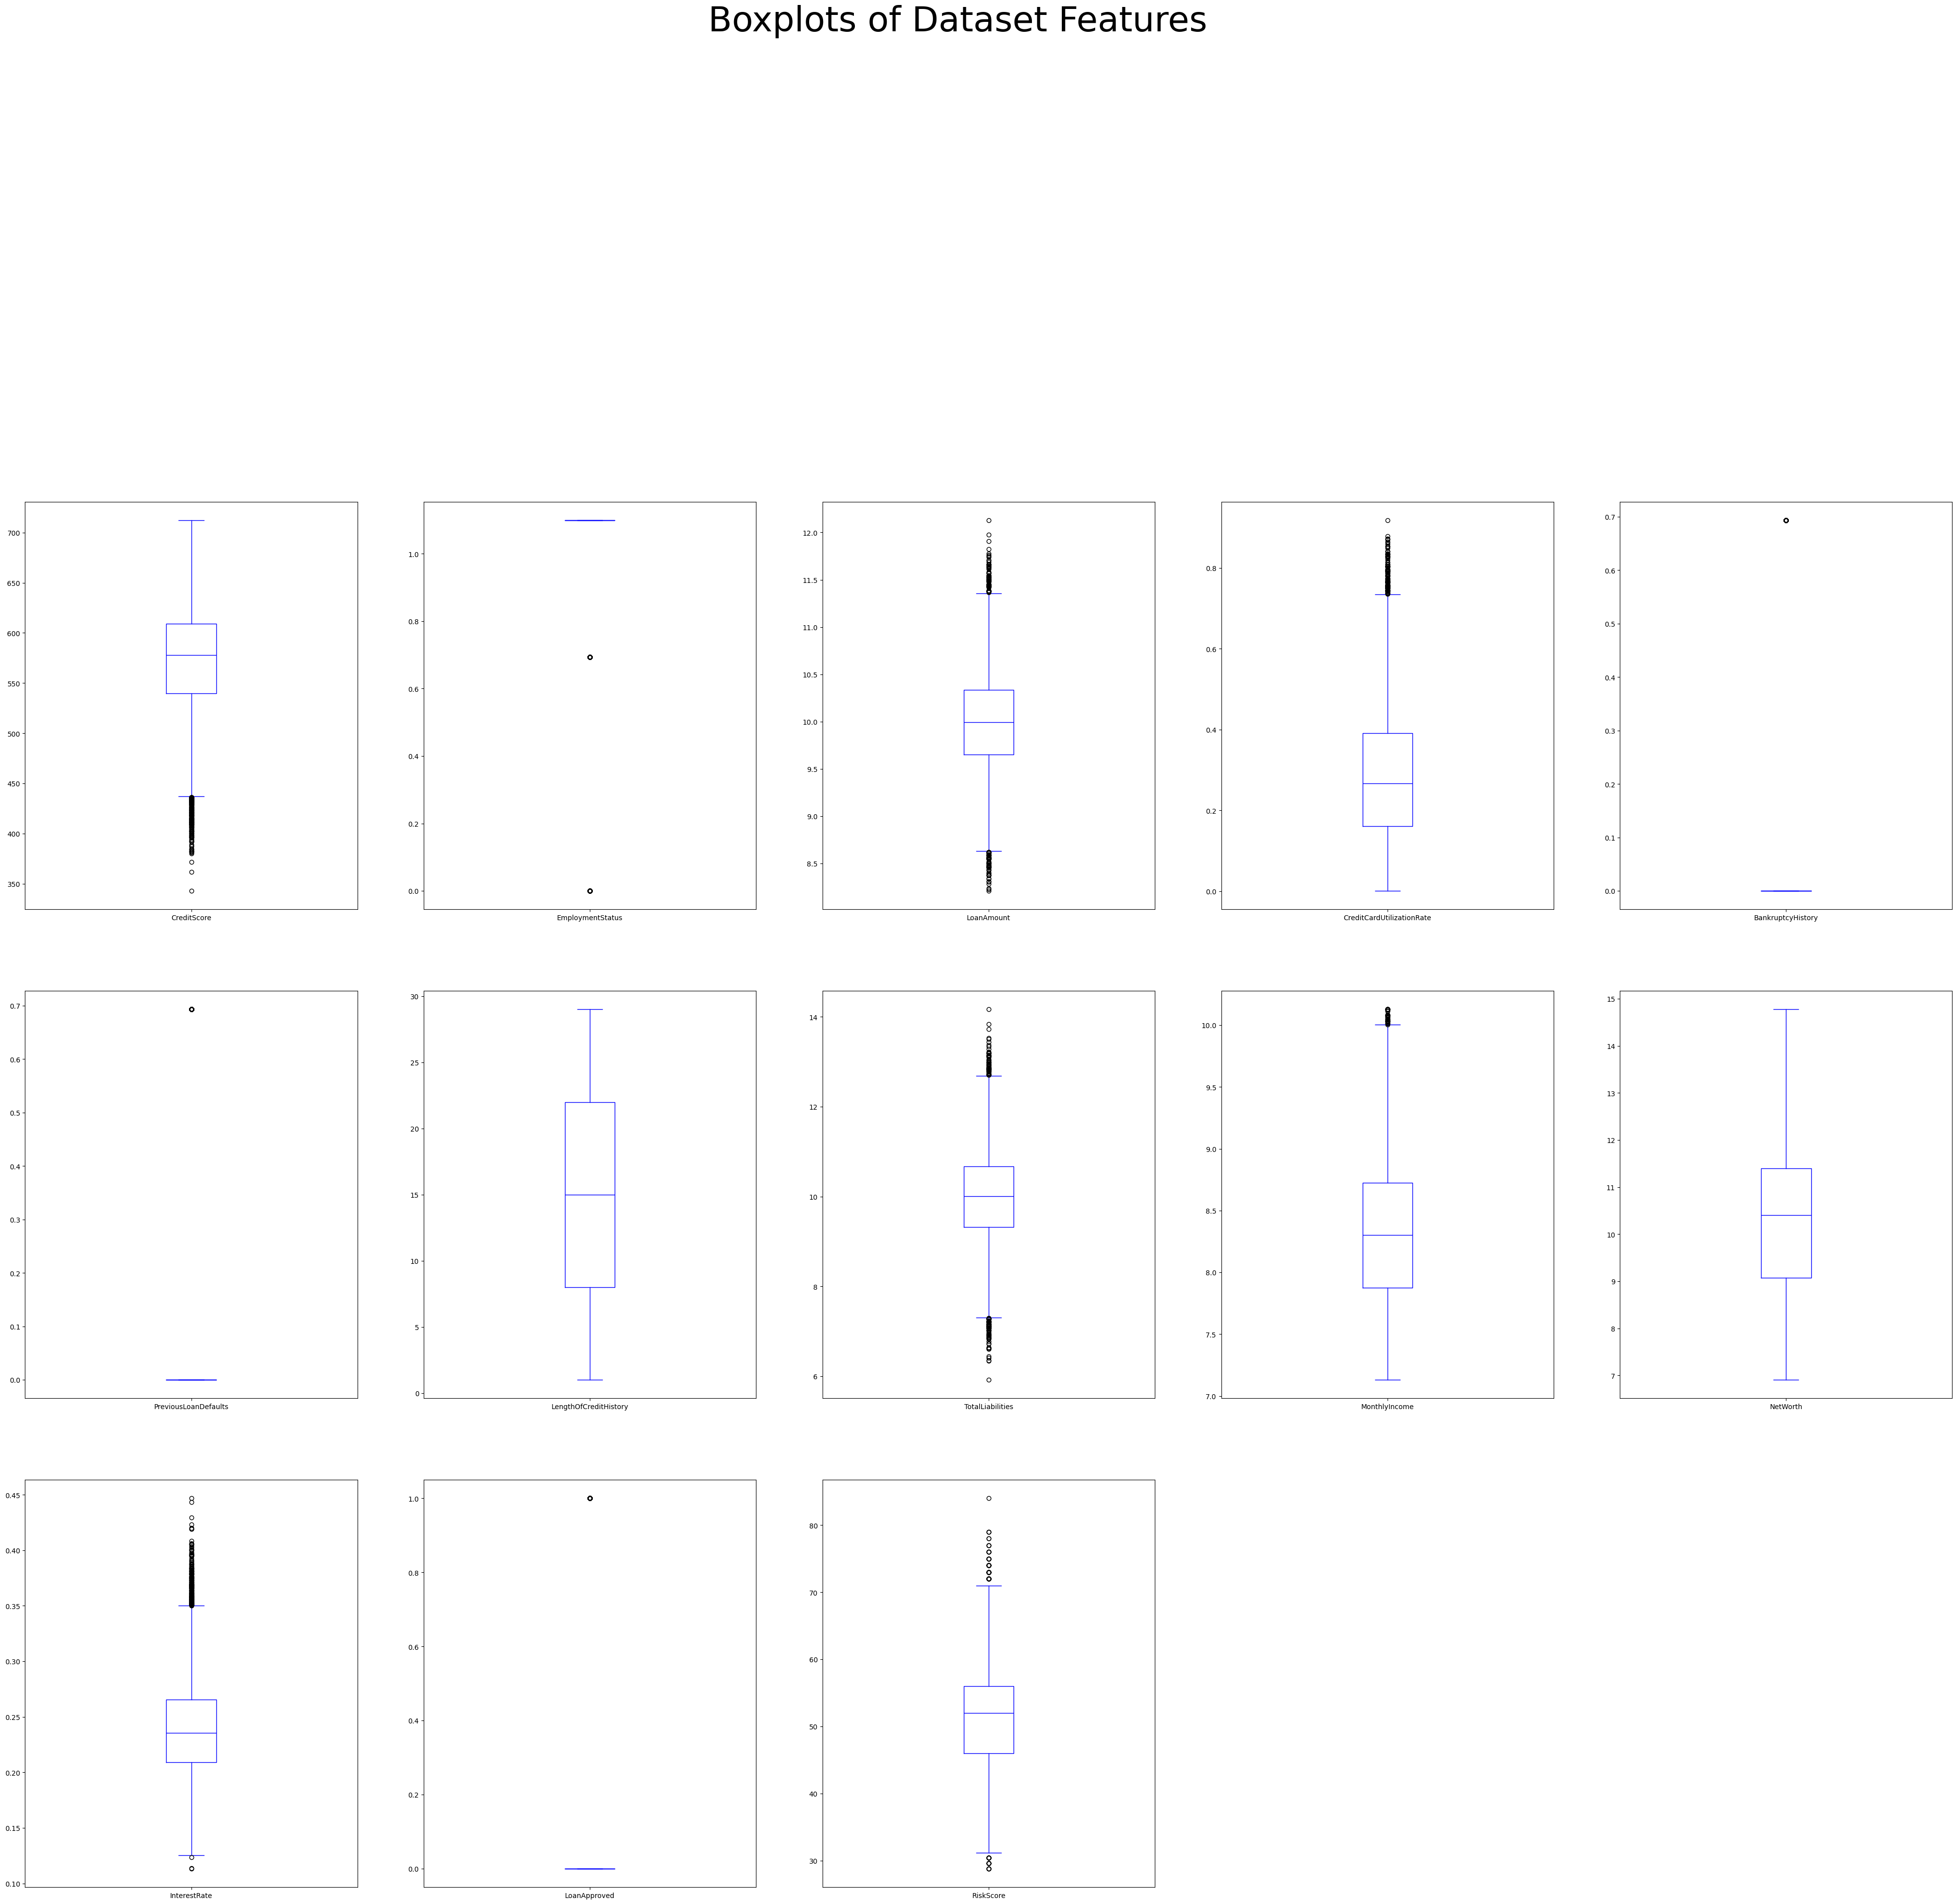

In [ ]:
loan.plot(kind="box",subplots=True,layout=(8,5),figsize=(50,100),color="blue")
plt.suptitle("Boxplots of Dataset Features",fontsize=50)
plt.show()

In [ ]:
# create a copy of the original data for comparison
loan_copy=loan.copy()

def remove_outliers_iqr(df,exclude_columns):
  # loop through numeric columns
  for column in df.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue #skip exclude columns
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    # define outlier bounds
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    # filter out the outlier
    df=df[(df[column] >= lower_bound)&(df[column]<=upper_bound)]
  return df
# define the columns to exclude
exclude_columns=['LoanApproved','RiskScore']
# remove outlier
loan=remove_outliers_iqr(loan,exclude_columns)
#print shapes of data before and after removing outliers
print("shape of data before removing outliers:",loan_copy.shape)
print("shape of data after removing outliers:",loan.shape)
print("Number of  outliers removed:",loan_copy.shape[0]- loan.shape[0])


shape of data before removing outliers: (20000, 13)
shape of data after removing outliers: (13849, 13)
Number of  outliers removed: 6151


# model building

##  Regression model

* riskscore regression: to predict a continuous risk score associated with each individual's likelihood of loan default instability


In [ ]:
x1=loan.drop('RiskScore',axis=1)
y1=loan[['RiskScore']]

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)
print("shape of Training Features:",x1_train.shape)
print("shape of Testing Features:",x1_test.shape)
print("shape of Training Target :",y1_train.shape)
print("shape of Testing Target :",y1_test.shape)

shape of Training Features: (11079, 12)
shape of Testing Features: (2770, 12)
shape of Training Target : (11079, 1)
shape of Testing Target : (2770, 1)


In [ ]:
models={
    "Linear_Regression":LinearRegression(),
    "RandomForest_Regressor":RandomForestRegressor(),
    "GradientBoosting_Regressor":GradientBoostingRegressor(),
    "DecisionTree_Regressor":DecisionTreeRegressor(),
    "SVM":SVR(),
    #"MLP_regressor": MLPRegressor(max_iter=500),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    "LGBMRegressor":LGBMRegressor(),
    # 'catBoostRegressor':catBoostRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [ ]:
# dictionary to store results
results={'model':[],'MSE':[],'MAE':[],'R2':[]}
# loop through the models train them and calculate the metrics
for model_name,model in models.items():
  # Train the model
  model.fit(x1_train,y1_train)
  # make prediction
  y1_pred=model.predict(x1_test)

  mse=mean_squared_error(y1_test,y1_pred)
  mae=mean_absolute_error(y1_test,y1_pred)
  r2=r2_score(y1_test,y1_pred)

  # store results in the dictionary
  results['model'].append(model_name)
  results['MSE'].append(mse)
  results['MAE'].append(mae)
  results['R2'].append(r2)

  #  converts results to a DataFrame
results_df=pd.DataFrame(results)
  # Display the results
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1797
[LightGBM] [Info] Number of data points in the train set: 11079, number of used features: 9
[LightGBM] [Info] Start training from score 48.872335


,model,MSE,MAE,R2
0,Linear_Regression,9.788375,2.558468,0.791813
1,RandomForest_Regressor,7.577684,2.324798,0.838832
2,GradientBoosting_Regressor,6.948199,2.255912,0.852220
3,DecisionTree_Regressor,14.662238,3.046354,0.688152
4,SVM,42.864007,5.085747,0.088335
5,AdaBoostRegressor,8.204908,2.476953,0.825492
6,BaggingRegressor,8.265168,2.412361,0.824210
7,LGBMRegressor,7.132404,2.273067,0.848303
8,XGBRegressor,7.861235,2.342259,0.832801


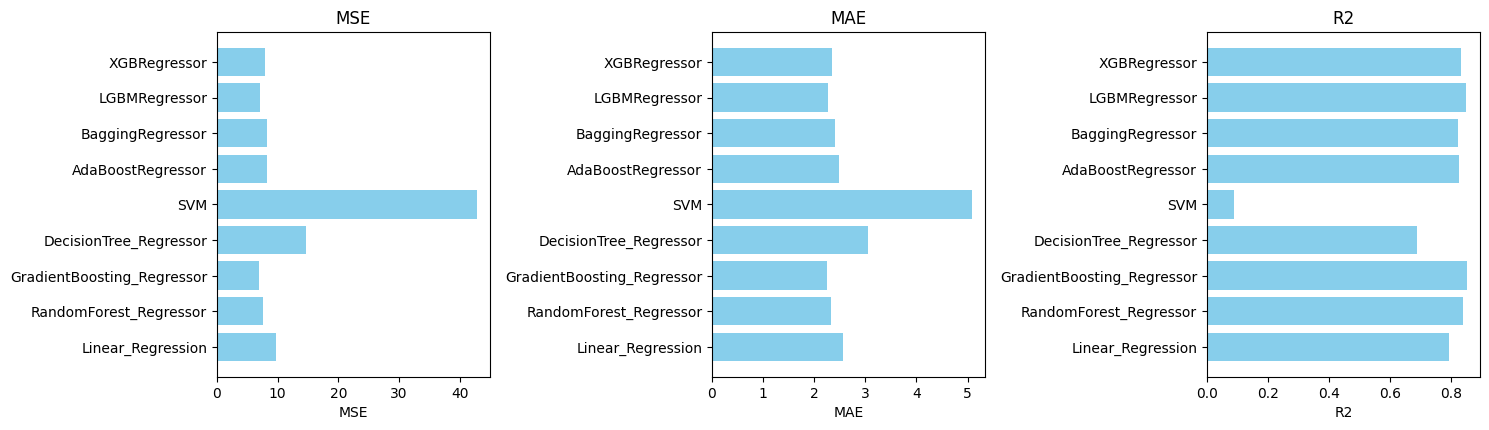

In [ ]:
# ploting each metric
metrics=['MSE','MAE','R2']

plt.figure(figsize=(15,8))

for i, metric in enumerate(metrics):
  plt.subplot(2,3,i+1)
  plt.barh(results_df['model'],results_df[metric],color="skyblue")
  plt.title(metric)
  #plt.xlim(0,1)
  plt.xlabel(metric)
plt.tight_layout()
plt.show()

#### Regression On scaled Data

In [ ]:
x1s=loan_scaled_df.drop('RiskScore',axis=1)
y1s=loan_scaled_df[['RiskScore']]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)
# dictionary to store results
results={'model':[],'MSE':[],'MAE':[],'R2':[]}
# loop through the models train them and calculate the metrics
for model_name,model in models.items():
  # Train the model
  model.fit(x1s_train,y1s_train)
  # make prediction
  y1s_pred=model.predict(x1s_test)

  mse1=mean_squared_error(y1s_test,y1s_pred)
  mae1=mean_absolute_error(y1s_test,y1s_pred)
  r21=r2_score(y1_test,y1_pred)

  # store results in the dictionary
  results['model'].append(model_name)
  results['MSE'].append(mse1)
  results['MAE'].append(mae1)
  results['R2'].append(r21)

  #  converts results to a DataFrame
  results_df1=pd.DataFrame(results)
  # Display the results
  # results_df1
# sort by Accuracy
results_df1=results_df1.sort_values(by="MSE",ascending=True)
# display the sorted DataFrame with background gradient
results_df1.style.background_gradient('Blues')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1796
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.009876


,model,MSE,MAE,R2
2,GradientBoosting_Regressor,0.113993,0.287844,0.832801
7,LGBMRegressor,0.115594,0.289572,0.832801
8,XGBRegressor,0.126902,0.300170,0.832801
1,RandomForest_Regressor,0.127872,0.299985,0.832801
6,BaggingRegressor,0.137349,0.307046,0.832801
4,SVM,0.140560,0.305232,0.832801
0,Linear_Regression,0.163206,0.329533,0.832801
5,AdaBoostRegressor,0.177175,0.357359,0.832801
3,DecisionTree_Regressor,0.242433,0.386921,0.832801


Based on the analysis of the loan approvel dataset for predicting the rickscore , the GradientBoostingRegressor model demonstrated the best performance among the tested models

## classification modeling

* Binary loan approvel classification : to determine the binary outcome of loan approvel , indicating whether an applicant is likely to approved or denied for a loan

In [ ]:
loan['LoanApproved']=loan['LoanApproved'].astype(int)
x=loan.drop('LoanApproved',axis=1)
y=loan[["LoanApproved"]]

In [ ]:
loan[['LoanApproved']].value_counts()

,count
LoanApproved,
0,10254
1,3595


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print("shape of Training Features:",x_train.shape)
print("shape of Testing Features:",x_test.shape)
print("shape of Training Target :",y_train.shape)
print("shape of Testing Target :",y_test.shape)

shape of Training Features: (11079, 12)
shape of Testing Features: (2770, 12)
shape of Training Target : (11079, 1)
shape of Testing Target : (2770, 1)


In [ ]:
class_models={'lr':LogisticRegression(max_iter=500),
    "rfc":RandomForestClassifier(),
    "gbc":GradientBoostingClassifier(random_state=0,learning_rate=0.45),
    "dtc":DecisionTreeClassifier(),
    "SVM":SVC(kernel='linear'),
    'knn':KNeighborsClassifier(n_neighbors=11),
    'etc':ExtraTreesClassifier(),
    'nb':GaussianNB()

}

In [ ]:
# dictionary to store results
results={'model':[],'Accuracy':[],'precision':[],'recall':[],'f-1score':[]}

for model_name,model in class_models.items():
  # Train the model
  model.fit(x_train,y_train)
  model_pred=model.predict(x_test)

  # calculate metrics
  accuracy=accuracy_score(y_test,model_pred)
  precision=precision_score(y_test,model_pred)
  recall=recall_score(y_test,model_pred)
  f1=f1_score(y_test,model_pred)

   # stores result in the dictionary
  results['model'].append(model)
  results['Accuracy'].append(accuracy)
  results['precision'].append(precision)
  results['recall'].append(recall)
  results['f-1score'].append(f1)

#  converts results to a DataFrame
results_df1=pd.DataFrame(results)
# Display the results
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

,model,MSE,MAE,R2
0,Linear_Regression,9.788375,2.558468,0.791813
1,RandomForest_Regressor,7.577684,2.324798,0.838832
2,GradientBoosting_Regressor,6.948199,2.255912,0.852220
3,DecisionTree_Regressor,14.662238,3.046354,0.688152
4,SVM,42.864007,5.085747,0.088335
5,AdaBoostRegressor,8.204908,2.476953,0.825492
6,BaggingRegressor,8.265168,2.412361,0.824210
7,LGBMRegressor,7.132404,2.273067,0.848303
8,XGBRegressor,7.861235,2.342259,0.832801


In [ ]:
x2s=loan_scaled_df.drop('LoanApproved',axis=1)
y2s=loan_scaled_df[['LoanApproved']]
x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size=0.2)
# dictionary to store results
results={'model':[],'Accuracy':[],'precision':[],'recall':[],'f-1score':[]}
# loop through the models train them and calculate the metrics
for model_name,model in class_models.items():
  # Train the model
  model.fit(x2s_train,y2s_train)
  # make prediction
  model_pred2s=model.predict(x2s_test)

  # calculate metrics
  accuracy2=accuracy_score(y2s_test,model_pred2s)
  precision2=precision_score(y2s_test,model_pred2s)
  recall2=recall_score(y2s_test,model_pred2s)
  f12=f1_score(y2s_test,model_pred2s)
  # stores result in the dictionary
  results['model'].append(model)
  results['Accuracy'].append(accuracy2)
  results['precision'].append(precision2)
  results['recall'].append(recall2)
  results['f-1score'].append(f12)
#  converts results to a DataFrame
results_df2=pd.DataFrame(results)
# Display the results
results_df2=results_df2.sort_values(by='Accuracy',ascending=False)
results_df1.style.background_gradient('Greens')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

,model,Accuracy,precision,recall,f-1score
0,LogisticRegression(max_iter=500),0.981949,0.977077,0.952514,0.964639
1,RandomForestClassifier(),0.991697,0.990099,0.977654,0.983837
2,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.997834,0.997199,0.994413,0.995804
3,DecisionTreeClassifier(),0.992058,0.988732,0.980447,0.984572
4,SVC(kernel='linear'),0.989170,0.988604,0.969274,0.978843
5,KNeighborsClassifier(n_neighbors=11),0.981588,0.979798,0.948324,0.963804
6,ExtraTreesClassifier(),0.990614,0.990057,0.973464,0.981690
7,GaussianNB(),0.978339,0.959384,0.956704,0.958042


Based on the evaluation of the classification models for predicting loan approvel, the GradientBoostingClassifier with a learning rate of
 0.45 and random state set to 0 emerged a sthe best performimg model. it achieved the highest accuracy and consitently strong results across precision ,recall and f-1 scores , making it the most reiable  model for classifying whether a loan is approved or not in the loan dataset

# pickle file

In [ ]:
import pickle

# save the regression model
r_model = GradientBoostingRegressor()
r_model.fit(x1s_train,y1s_train.values.ravel())
with open ('Regression_model.pkl','wb') as file:
  pickle.dump(r_model, file)

# save the classification model
c_model = GradientBoostingClassifier(random_state=0,learning_rate=0.45)
c_model.fit(x2s_train,y2s_train.values.ravel())
with open ('classification_model.pkl','wb') as file:
  pickle.dump(c_model, file)
